Оценка доходов человека по его личным данным.

Попов Андрей Андревич

0.Описание задачи



Доход человека зависит от множества факторов. Интуитивно понятно, что на него влияют уровень образования, возраст, пол, профессия и т.д. Данный датасет содержит личную информацию о человеке.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings

In [105]:
data_path="adult.csv"
data_row=pd.read_csv(data_path)

In [106]:
data_row.shape

(48842, 15)

In [107]:
data_row.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [108]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Подготовка датасета

In [109]:
data_row.duplicated().sum()

52

In [110]:
data_row.drop_duplicates(inplace= True)

In [111]:
data_row.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [112]:
data_row.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Заменим значения <=50K на 0, а >50K на 1

Удаляем пробелы в начале и конце всех названий столбцов

In [113]:
data_row.columns = data_row.columns.str.strip()

In [114]:
data_row['income'] = data_row['income'].str.strip()
data_row['income'] = data_row['income'].replace('>50K','1')
data_row['income'] = data_row['income'].replace('<=50K','0')
data_row['income'] = data_row['income'].astype('int64')

Заменим значения полей Male и Femeale в поле sex на 0 и 1 соответственно

In [115]:
data_row['gender'] = data_row['gender'].str.strip()
data_row['gender'] = data_row['gender'].replace('Male','0')
data_row['gender'] = data_row['gender'].replace('Female','1')
data_row['gender'] = data_row['gender'].astype('int64')

Объединим доход и потери капитала в один столбец

In [116]:
data_row['capital_total'] = data_row['capital-gain'] - data_row['capital-loss']
data_row=data_row.drop(['capital-gain','capital-loss'],axis=1)

Рассмотрим записи, у которых неизвестна страна происхождения

In [117]:
unknown_country_weights = data_row[data_row['native-country'] == ' ?']['fnlwgt'].sum()

total_weights = data_row['fnlwgt'].sum()

ratio = unknown_country_weights
ratio / total_weights

0.0

Так как суммарный вес всех таких записей представляет около 1% от суммарного веса всех записей, то их можно опустить

In [118]:
data_row['native-country'] = data_row['native-country'].str.strip()
data_row = data_row[data_row['native-country'] != '?']

Конечная версия датасета будет выглядеть следующим образом

In [119]:
data_row.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_total
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,40,United-States,1,7688
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,1,30,United-States,0,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,30,United-States,0,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,0,40,United-States,0,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,0,32,United-States,1,3103
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,1,40,United-States,0,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,0,10,United-States,0,0


In [120]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47934 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47934 non-null  int64 
 1   workclass        47934 non-null  object
 2   fnlwgt           47934 non-null  int64 
 3   education        47934 non-null  object
 4   educational-num  47934 non-null  int64 
 5   marital-status   47934 non-null  object
 6   occupation       47934 non-null  object
 7   relationship     47934 non-null  object
 8   race             47934 non-null  object
 9   gender           47934 non-null  int64 
 10  hours-per-week   47934 non-null  int64 
 11  native-country   47934 non-null  object
 12  income           47934 non-null  int64 
 13  capital_total    47934 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.5+ MB


In [121]:
data_row.shape

(47934, 14)

In [122]:
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']:
    data_row[column] = data_row[column].astype('category')


### Визуализация данных, борьба с выбросами

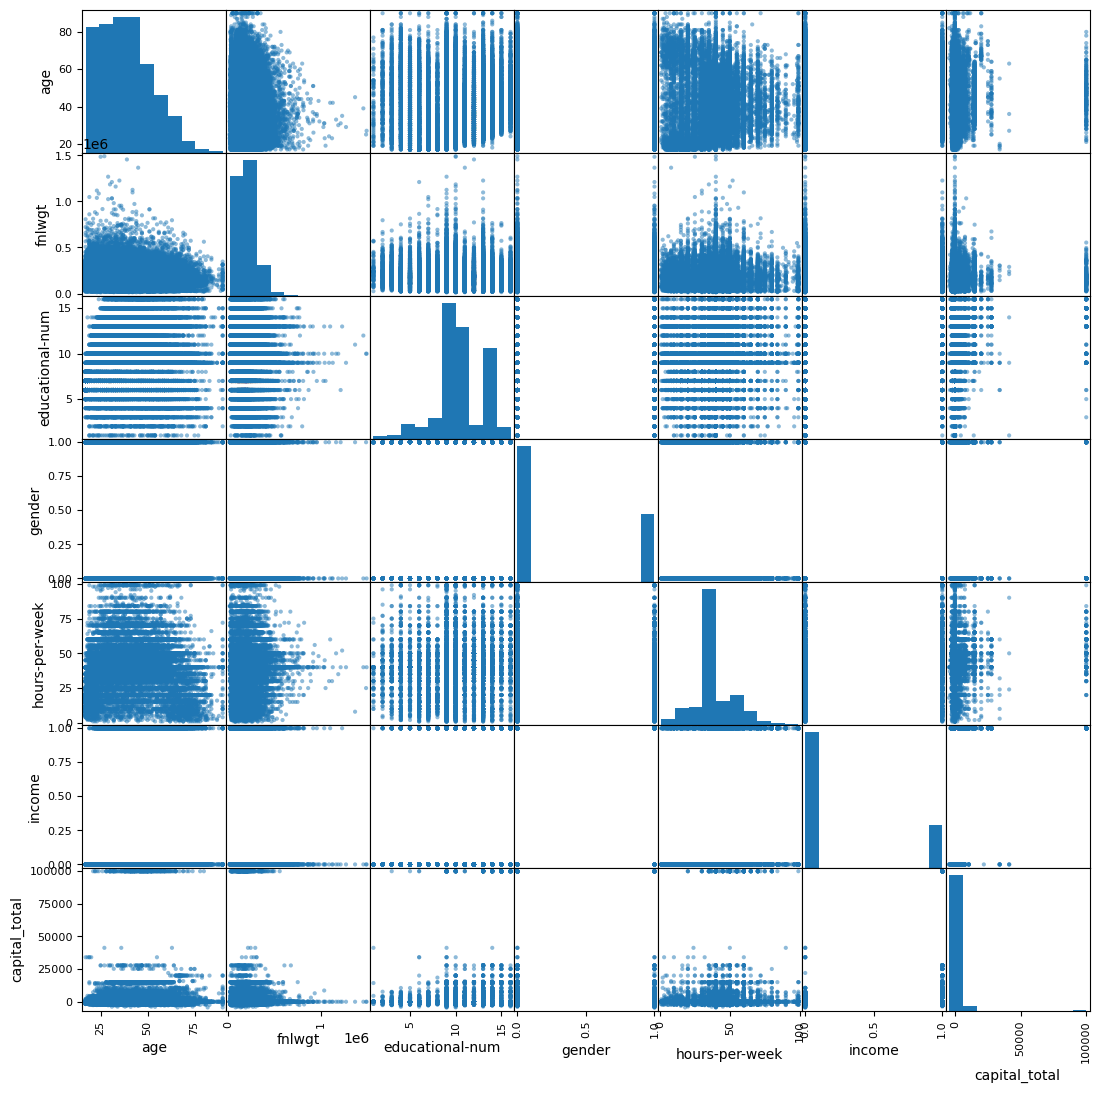

In [123]:
pd.plotting.scatter_matrix(data_row, figsize = (13, 13))
pass

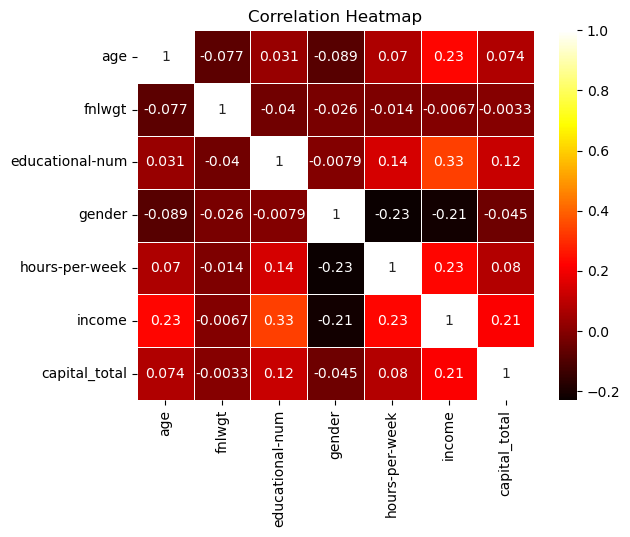

In [124]:
cor = data_row.select_dtypes(include=['int64']).corr()
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых принаков.

In [125]:
data_row = pd.get_dummies(data_row)

Нормализация признаков

In [126]:
scaler = StandardScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(data_row), columns=data_row.columns)

dataset_normalized.describe()

,age,fnlwgt,educational-num,gender,hours-per-week,income,capital_total,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,...,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,4.793400e+04,47934.000000,4.793400e+04,4.793400e+04,4.793400e+04
mean,3.172198e-17,-7.826732e-17,-1.104340e-16,1.956683e-17,-2.598534e-16,-7.886025e-17,-3.127728e-17,-3.275962e-17,-2.208680e-17,-5.454995e-17,...,6.225809e-18,-1.600922e-17,5.781109e-18,1.378572e-17,-3.261138e-18,1.689863e-17,0.000000,-1.262950e-16,-1.689863e-17,1.126575e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.577177e+00,-1.676368e+00,-3.542810e+00,-7.054479e-01,-3.180651e+00,-5.605644e-01,-7.211132e-01,-2.466552e-01,-1.738343e-01,-2.629524e-01,...,-3.741272e-02,-6.207579e-02,-2.093548e-02,-4.903980e-02,-3.684932e-02,-2.502504e-02,-0.023740,-3.251564e+00,-4.239526e-02,-2.191020e-02
25%,-7.758575e-01,-6.829373e-01,-4.172355e-01,-7.054479e-01,-3.349135e-02,-5.605644e-01,-1.325160e-01,-2.466552e-01,-1.738343e-01,-2.629524e-01,...,-3.741272e-02,-6.207579e-02,-2.093548e-02,-4.903980e-02,-3.684932e-02,-2.502504e-02,-0.023740,3.075443e-01,-4.239526e-02,-2.191020e-02
50%,-1.202327e-01,-1.089506e-01,-2.653876e-02,-7.054479e-01,-3.349135e-02,-5.605644e-01,-1.325160e-01,-2.466552e-01,-1.738343e-01,-2.629524e-01,...,-3.741272e-02,-6.207579e-02,-2.093548e-02,-4.903980e-02,-3.684932e-02,-2.502504e-02,-0.023740,3.075443e-01,-4.239526e-02,-2.191020e-02
75%,6.810865e-01,4.548940e-01,7.548548e-01,1.417539e+00,3.699907e-01,-5.605644e-01,-1.325160e-01,-2.466552e-01,-1.738343e-01,-2.629524e-01,...,-3.741272e-02,-6.207579e-02,-2.093548e-02,-4.903980e-02,-3.684932e-02,-2.502504e-02,-0.023740,3.075443e-01,-4.239526e-02,-2.191020e-02
max,3.740669e+00,1.229816e+01,2.317642e+00,1.417539e+00,4.727597e+00,1.783916e+00,1.337968e+01,4.054243e+00,5.752605e+00,3.802970e+00,...,2.672888e+01,1.610934e+01,4.776580e+01,2.039160e+01,2.713754e+01,3.995998e+01,42.122836,3.075443e-01,2.358754e+01,4.564085e+01


Разбиение выборки на обучающую и тестовую

In [127]:

x = dataset_normalized.drop(['income'], axis=1)
y = data_row['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

K-neighbors

In [128]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7246
           1       0.66      0.55      0.60      2341

    accuracy                           0.82      9587
   macro avg       0.76      0.73      0.74      9587
weighted avg       0.81      0.82      0.82      9587



Подберем лучшее K

In [129]:
param_grid = {'n_neighbors': range(1, 30)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_k

19

In [130]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

y_pred = best_knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [131]:
y_train_pred = best_knn.predict(x_train)
train_error = mean_squared_error(y_train, y_train_pred)
print(f'Ошибок на обучающей выборке: {train_error:.2f}')

y_test_pred = best_knn.predict(x_test)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Ошибок на тестовой выборке: {test_error:.2f}')

Ошибок на обучающей выборке: 0.15
Ошибок на тестовой выборке: 0.17


Random Forest

In [132]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

0.8507353708146448

воспользуемся SMOTE для преодоления несбалансированности классов

In [133]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(x_resampled, y_resampled)
rf_smote_pred = rf_smote.predict(x_test)
rf_smote_accuracy = accuracy_score(y_test, rf_smote_pred)
rf_smote_accuracy

0.838218420778137

Из корреляционной матрицы исключаем переменные с корреляцией >0.95, чтобы избежать мультиколлинеарности, для повышенния стабильности и точности модели

In [134]:
correlation_matrix = dataset_normalized.corr().abs()


upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

dataset_reduced = dataset_normalized.drop(columns=to_drop)

x_reduced = dataset_reduced.drop(['income'], axis=1)
y_reduced = data_row['income']
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_reduced, y_reduced, test_size=0.2, random_state=42)

rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(x_train_red, y_train_red)
rf_reduced_pred = rf_reduced.predict(x_test_red)
rf_reduced_accuracy = accuracy_score(y_test_red, rf_reduced_pred)
print(f'Random Forest with reduced features Accuracy: {rf_reduced_accuracy:.2f}')

Random Forest with reduced features Accuracy: 0.85


Подберем гиперпараметры для Random Forest

In [135]:
import warnings
warnings.filterwarnings('ignore')


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(f'Лучшие гиперпараметры: {best_params}')

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy:.2f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

Общие выводы:
* Random Forest - лучший выбор для задач классификации из-за точности
* Модель KNN менее точна, чем Random Forest